In [15]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_frame = pd.read_csv('diabetes.csv')
data_frame.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [17]:
data_frame.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Das Minimum bei bspw. Blutdruck ist 0. Diese Daten sind nicht valide und sollten aus diesem Grund durch Null oder NaN ersetzt werden.

In [18]:
def make_correct(df, column_name: str):
    df.loc[df[column_name] == 0.0, column_name] = np.NAN

make_correct(data_frame, column_name='Glucose')
make_correct(data_frame, column_name='BloodPressure')
make_correct(data_frame, column_name='SkinThickness')
make_correct(data_frame, column_name='Insulin')
make_correct(data_frame, column_name='BMI')
data_frame.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [19]:
cleared_data_frame = data_frame.dropna(axis=0)
cleared_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 3 to 765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               392 non-null    int64  
 1   Glucose                   392 non-null    float64
 2   BloodPressure             392 non-null    float64
 3   SkinThickness             392 non-null    float64
 4   Insulin                   392 non-null    float64
 5   BMI                       392 non-null    float64
 6   DiabetesPedigreeFunction  392 non-null    float64
 7   Age                       392 non-null    int64  
 8   Outcome                   392 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 30.6 KB


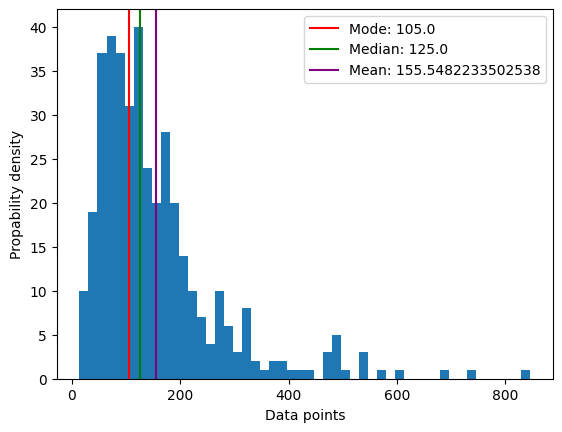

In [20]:
insulin = data_frame['Insulin']
mode = insulin.mode()[0]
median = insulin.median()
mean = insulin.mean()
plt.hist(insulin, bins=50)
plt.axvline(mode, color='red', label=f"Mode: {mode}")
plt.axvline(median, color='green', label=f"Median: {median}")
plt.axvline(mean, color='purple', label=f"Mean: {mean}")
plt.xlabel("Data points")
plt.ylabel("Propability density")
plt.legend()

In [21]:
mean_data_frame = data_frame.fillna(value = {"Insulin": mean})
mean_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


Der Strich für das 0.5 Quantil liegt vermutlich sehr nah am 0.75 Quantil, da wir ja sehr viel mean eingefügt haben.

121.5
155.5482233502538
155.5482233502538


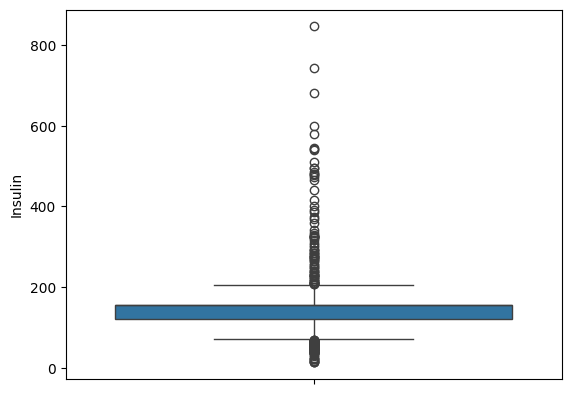

In [22]:
sns.boxplot(y = mean_data_frame["Insulin"])
quantil25 = mean_data_frame.Insulin.quantile(0.25)
quantil50 = mean_data_frame.Insulin.quantile(0.5)
quantil75 = mean_data_frame.Insulin.quantile(0.75)
print(quantil25)
print(quantil50)
print(quantil75)

<Axes: ylabel='Insulin'>

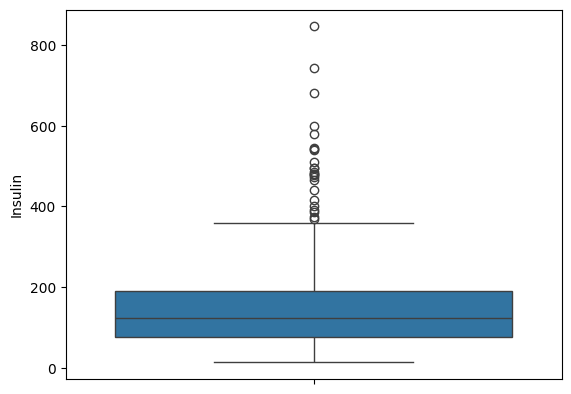

In [23]:
sns.boxplot(y = data_frame.Insulin)

Korrelationskoeffizient sagt aus, wie stark ein Wert mit anderen Wert zusammenhängt. (1 = kompletter Zusammenhang, -1 = kompletter Gegensatz, 0 = kein Zusammenhang)

In [24]:
cleared_data_frame.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.198291,0.213355,0.093209,0.078984,-0.025347,0.007562,0.679608,0.256566
Glucose,0.198291,1.000000,0.210027,0.198856,0.581223,0.209516,0.140180,0.343641,0.515703
BloodPressure,0.213355,0.210027,1.000000,0.232571,0.098512,0.304403,-0.015971,0.300039,0.192673
SkinThickness,0.093209,0.198856,0.232571,1.000000,0.182199,0.664355,0.160499,0.167761,0.255936
Insulin,0.078984,0.581223,0.098512,0.182199,1.000000,0.226397,0.135906,0.217082,0.301429
BMI,-0.025347,0.209516,0.304403,0.664355,0.226397,1.000000,0.158771,0.069814,0.270118
DiabetesPedigreeFunction,0.007562,0.140180,-0.015971,0.160499,0.135906,0.158771,1.000000,0.085029,0.209330
Age,0.679608,0.343641,0.300039,0.167761,0.217082,0.069814,0.085029,1.000000,0.350804
Outcome,0.256566,0.515703,0.192673,0.255936,0.301429,0.270118,0.209330,0.350804,1.000000


Mit fehlenden Werten bei Glucose das Insuolin vorhersagen. Dafür werden wir bspw. maschinelles Lernen benötigen.(Optimierunsaufgabe)

In [25]:
glocose_cleared_data_frame = data_frame.dropna(axis=0, subset=['Glucose'])
glocose_cleared_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 763 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               763 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             728 non-null    float64
 3   SkinThickness             536 non-null    float64
 4   Insulin                   393 non-null    float64
 5   BMI                       752 non-null    float64
 6   DiabetesPedigreeFunction  763 non-null    float64
 7   Age                       763 non-null    int64  
 8   Outcome                   763 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 59.6 KB


In [26]:
glucose_insulin_cleared_data_frame = data_frame.dropna(axis=0, subset=['Glucose', 'Insulin'])
glucose_insulin_cleared_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 393 entries, 3 to 765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               393 non-null    int64  
 1   Glucose                   393 non-null    float64
 2   BloodPressure             393 non-null    float64
 3   SkinThickness             393 non-null    float64
 4   Insulin                   393 non-null    float64
 5   BMI                       392 non-null    float64
 6   DiabetesPedigreeFunction  393 non-null    float64
 7   Age                       393 non-null    int64  
 8   Outcome                   393 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 30.7 KB


Auf diesen Werten wird nun die Regression trainiert / durchgeführt.

In [27]:
training_data = glucose_insulin_cleared_data_frame.loc[:, ["Glucose", "Insulin"]]
missing_insulin = glocose_cleared_data_frame.Insulin.isnull()
missing = pd.DataFrame(glocose_cleared_data_frame.Glucose[missing_insulin])

In [28]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(training_data[['Glucose']], training_data['Insulin'])
model.predict(missing)

regression_data_frame = glocose_cleared_data_frame
prediction = model.predict(missing)
regression_data_frame.loc[missing_insulin, "Insulin"] = prediction
regression_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 763 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               763 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             728 non-null    float64
 3   SkinThickness             536 non-null    float64
 4   Insulin                   763 non-null    float64
 5   BMI                       752 non-null    float64
 6   DiabetesPedigreeFunction  763 non-null    float64
 7   Age                       763 non-null    int64  
 8   Outcome                   763 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 59.6 KB


Das hier sind nun die Rohdaten, die wir für die Regression verwenden werden. (grau) Dazu die fehlenden Werte. (blau)

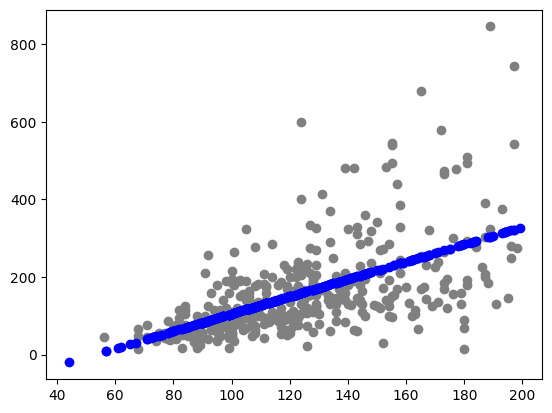

In [29]:
plt.scatter(glucose_insulin_cleared_data_frame.Glucose, glucose_insulin_cleared_data_frame.Insulin, color="grey")
plt.scatter(missing, glocose_cleared_data_frame["Insulin"][missing_insulin], color="blue")

Jetzt kommen die fehlenden Werte mit dazu.

<Axes: ylabel='Insulin'>

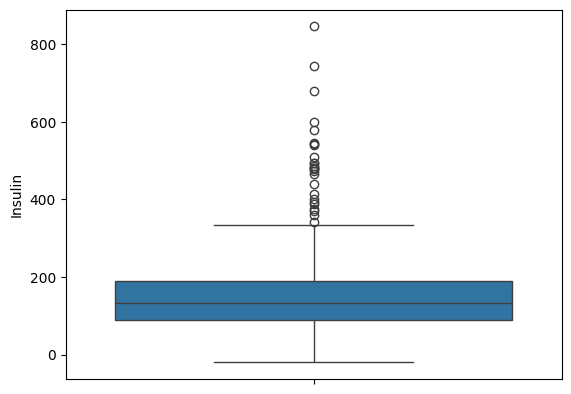

In [30]:
sns.boxplot(y = regression_data_frame.Insulin)
